In [1]:
import pandas as pd

In [2]:
col_names = ['age','sex','cp','trestbps','chol,fbs','restecg','thalach','exang,oldpeak','slope','ca','thal','target']
data = pd.read_csv('heart.csv', header = 1, names = col_names)

In [14]:
print (data.shape)
print (data.dtypes)


(1024, 12)
age                int64
sex                int64
cp                 int64
trestbps           int64
chol,fbs           int64
restecg            int64
thalach            int64
exang,oldpeak    float64
slope              int64
ca                 int64
thal               int64
target             int64
dtype: object


In [15]:
print (data.isnull())

print (data.describe())

        age    sex     cp  trestbps  chol,fbs  restecg  thalach  \
53 1  False  False  False     False     False    False    False   
70 1  False  False  False     False     False    False    False   
61 1  False  False  False     False     False    False    False   
62 0  False  False  False     False     False    False    False   
58 0  False  False  False     False     False    False    False   
...     ...    ...    ...       ...       ...      ...      ...   
59 1  False  False  False     False     False    False    False   
60 1  False  False  False     False     False    False    False   
47 1  False  False  False     False     False    False    False   
50 0  False  False  False     False     False    False    False   
54 1  False  False  False     False     False    False    False   

      exang,oldpeak  slope     ca   thal  target  
53 1          False  False  False  False   False  
70 1          False  False  False  False   False  
61 1          False  False  False  False  

In [16]:
data.head()

,,age,sex,cp,trestbps,"chol,fbs",restecg,thalach,"exang,oldpeak",slope,ca,thal,target
53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
58,0,0,100,248,0,0,122,0,1.0,1,0,2,1


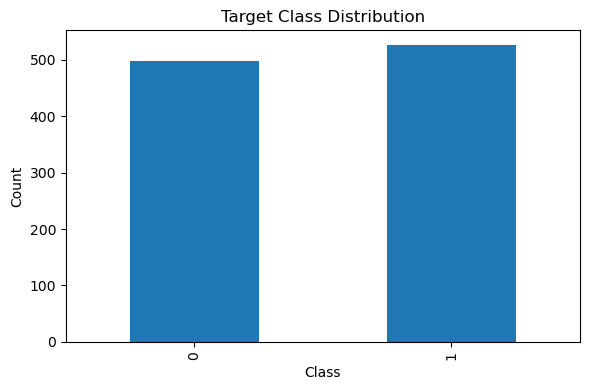

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
data['target'].value_counts().sort_index().plot(kind="bar")
plt.title("Target Class Distribution")
plt.xlabel("Class")
plt.ylabel("Count")
plt.tight_layout()
plt.show()

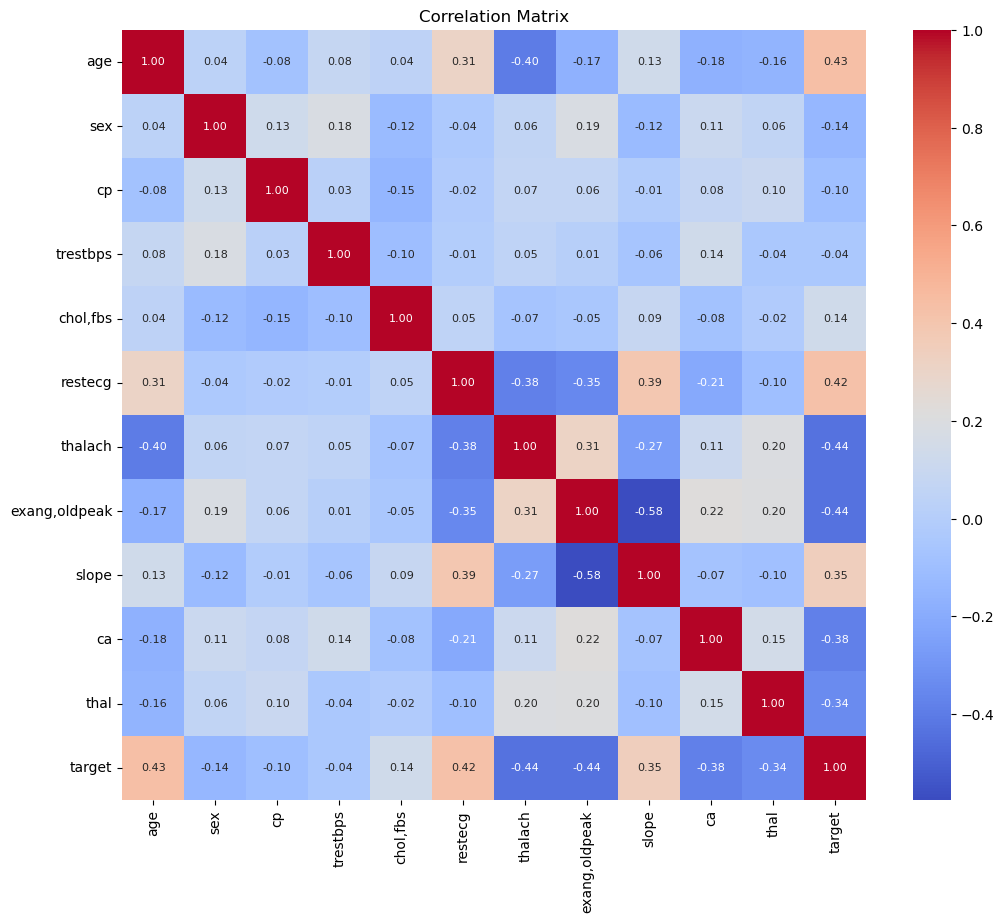

In [22]:
import numpy as np
import seaborn as sns

plt.figure(figsize=(12, 10))

corr_matrix = data.select_dtypes(include=np.number).corr()

sns.heatmap(
    corr_matrix,
    annot=True,
    cmap='coolwarm',
    fmt='.2f',
    annot_kws={"size": 8}   # smaller text
)

plt.title('Correlation Matrix')
plt.show()


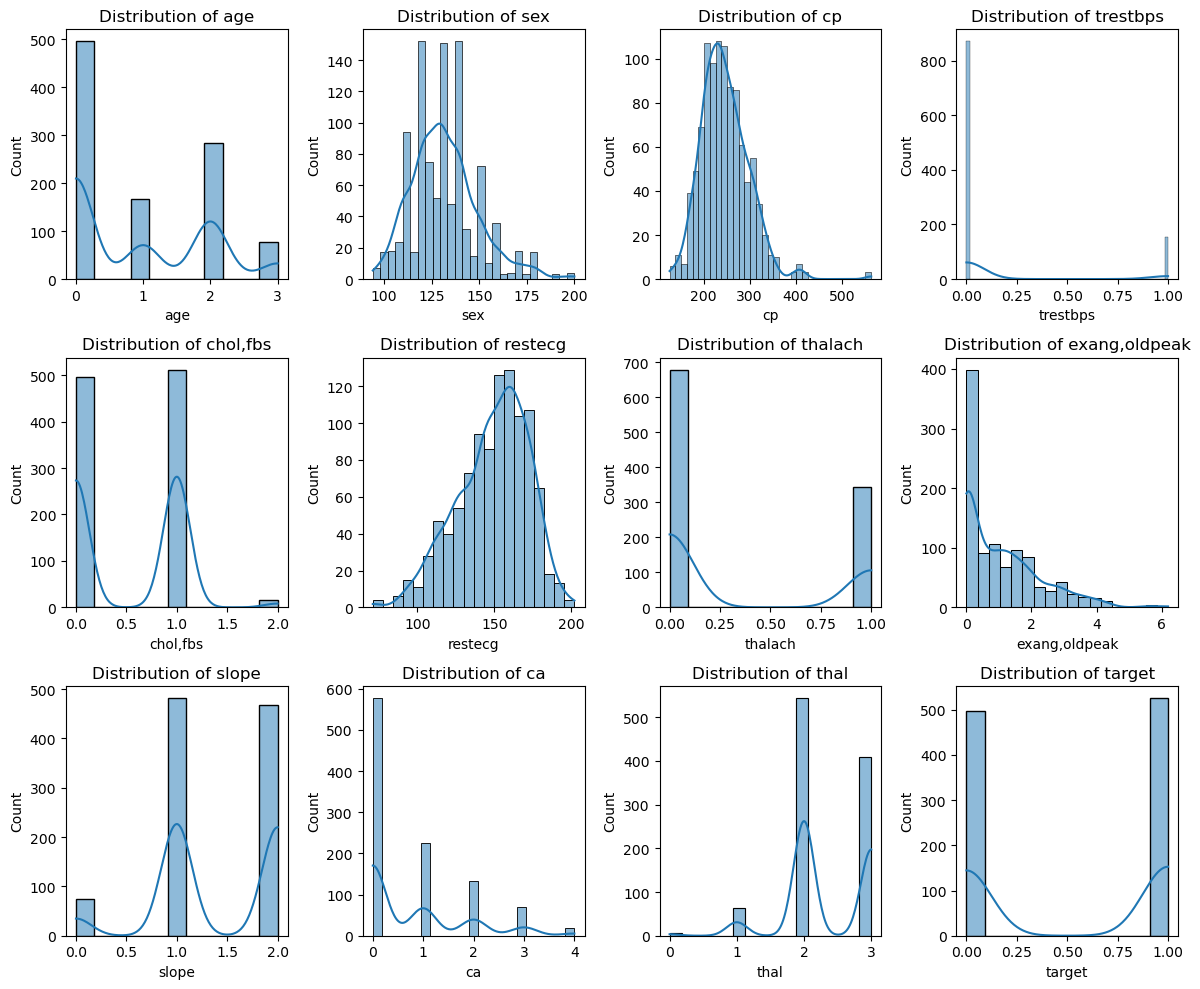

In [25]:
# Distribution of numerical features
plt.figure(figsize=(12, 10))

for i, col in enumerate(['age','sex','cp','trestbps','chol,fbs','restecg','thalach','exang,oldpeak','slope','ca','thal','target']):
    plt.subplot(3, 4, i + 1)
    sns.histplot(data[col], kde=True)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()


In [26]:
from sklearn.preprocessing import StandardScaler

X = data.drop(columns=['target'])
y = data['target']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame (optional but useful)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print(X_scaled.head())


        age       sex        cp  trestbps  chol,fbs   restecg   thalach  \
0 -0.916578  0.478538 -0.834275  2.385961 -1.003078  0.256729  1.402896   
1 -0.916578  0.764000 -1.396491 -0.419118  0.892036 -1.047724  1.402896   
2 -0.916578  0.935277 -0.834275 -0.419118  0.892036  0.517620 -0.712811   
3 -0.916578  0.364354  0.929921  2.385961  0.892036 -1.873877 -0.712811   
4 -0.916578 -1.805154  0.038130 -0.419118 -1.003078 -1.178169 -0.712811   

   exang,oldpeak     slope        ca      thal  
0       1.726238 -2.242694 -0.730956  1.091017  
1       1.300725 -2.242694 -0.730956  1.091017  
2      -0.911945  0.996401  0.239860  1.091017  
3       0.705006 -0.623146  2.181492 -0.521106  
4      -0.060918 -0.623146 -0.730956 -0.521106  


In [34]:
feature_names = ['age','sex','cp','trestbps','chol,fbs','restecg','thalach','exang,oldpeak','slope','ca','thal']
x = data[feature_names]
y = data.target

In [35]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x,y,test_size= 0.25, random_state=42)

In [36]:
from sklearn.linear_model import LogisticRegression

#instantiate the model (using the default parameters)
logreg = LogisticRegression(max_iter=1000)

#fit the model with data
logreg.fit(x_train, y_train)

y_pred = logreg.predict(x_test)


In [37]:
from sklearn import metrics

cnf_maxtrix = metrics.confusion_matrix(y_test, y_pred)
cnf_maxtrix


array([[ 95,  27],
       [ 19, 115]])

In [41]:
print ('Accuracy:', metrics.accuracy_score(y_test, y_pred))
print ('Prcision:', metrics.precision_score(y_test, y_pred))
print ('Recall', metrics.recall_score(y_test, y_pred))
print ('F1:', metrics.f1_score(y_test, y_pred))
print ('ROC-AUC',metrics.roc_auc_score(y_test,y_pred ))

Accuracy: 0.9121951219512195
Prcision: 0.8990825688073395
Recall 0.9333333333333333
F1: 0.9158878504672897
ROC-AUC 0.9116666666666667
